In [1]:
import re
from sklearn.base import BaseEstimator, TransformerMixin

class TextCleaner(BaseEstimator, TransformerMixin):    
    def remove_mentions(self, text):        
        return re.sub(r'@\w+', '', text)
    
    def remove_urls(self, text):        
        return re.sub(r'http.?://[^\s]+[\s]?', '', text)
    
    def only_characters(self, text):
        return re.sub('[^a-zA-Z\s]', '', text)
    
    def remove_extra_spaces(self, text):
        text = re.sub("\s+", ' ', text)
        text = text.lstrip()
        return text.rstrip()
    
    def to_lower(self, text):
        return text.lower()
    
    def fix_words(self, text):
        text = re.sub(r'\bthx\b', 'thanks', text)
        text = re.sub(r'\bu\b', 'you', text)
        text = re.sub(r'\bhrs\b', 'hours', text)
        text = re.sub(r'\baa\b', 'a', text)
        text = re.sub(r'\bflightr\b', 'flight', text)
        text = re.sub(r'\bur\b', 'your', text)
        text = re.sub(r'\bhr\b', 'hour', text)
        text = re.sub(r'\bthru\b', 'through', text)
        text = re.sub(r'\br\b', 'are', text)
        text = re.sub(r'\bppl\b', 'people', text)
        text = re.sub(r'\btix\b', 'fix', text)
        text = re.sub(r'\bplz\b', 'please', text)
        text = re.sub(r'\bflightd\b', 'flighted', text)
        text = re.sub(r'\btmrw\b', 'tomorrow', text)
        text = re.sub(r'\bthx\b', 'thanks', text)
        text = re.sub(r'\bpls\b', 'please', text)
        text = re.sub(r'\bfyi\b', 'for your information', text)
        
        text = re.sub(r'\bheyyyy\b', 'hey', text)
        text = re.sub(r'\bguyyyys\b', 'guys', text)
        text = re.sub(r'\byall\b', 'you all', text)
        text = re.sub(r'\basap\b', 'as soon as possible', text)
        text = re.sub(r'\bbtw\b', 'by the way', text)
        text = re.sub(r'\bdm\b', 'direct message', text)
        text = re.sub(r'\bcudtomers\b', 'customers', text)
        text = re.sub(r'\bwtf\b', 'what the fuck', text)
        text = re.sub(r'\biphone\b', 'phone', text)
        text = re.sub(r'\bmins\b', 'minutes', text)
        text = re.sub(r'\btv\b', 'television', text)
        text = re.sub(r'\bokay\b', 'ok', text)
        text = re.sub(r'\bfeb\b', 'february', text)
        text = re.sub(r'\byr\b', 'year', text)
        text = re.sub(r'\bshes\b', 'she is', text)
        text = re.sub(r'\bnope\b', 'no', text)
        text = re.sub(r'\bhes\b', 'he is', text)
        text = re.sub(r'\btill\b', 'until', text)
        text = re.sub(r'\bomg\b', 'oh my god', text)
        text = re.sub(r'\btho\b', 'though', text)
        text = re.sub(r'\bnothappy\b', 'not happy', text)
        return re.sub(r'\bthankyou\b', 'thank you', text)
        
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):        
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.only_characters).apply(self.remove_extra_spaces).apply(self.to_lower).apply(self.fix_words)
        return clean_X

In [2]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

import os, string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import utils
#from utils import *

import snowballstemmer
from nltk.corpus import stopwords

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin

In [3]:
PATH = os.getcwd()


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Airline-Sentiment-2-w-AA.csv to Airline-Sentiment-2-w-AA.csv


In [5]:
raw_df = pd.read_csv(f'{PATH}/Airline-Sentiment-2-w-AA.csv', encoding='ISO-8859-1')

In [6]:
raw_df.shape

(14640, 20)

In [7]:
raw_df.sample(5)

_unit_id  ...               user_timezone
4242   681454229  ...                         NaN
13992  681679150  ...                       Quito
13989  681679147  ...                       Quito
6937   681457434  ...                         NaN
13856  681679014  ...  Central Time (US & Canada)

[5 rows x 20 columns]

In [8]:
raw_df.isnull().sum()

_unit_id                            0
_golden                             0
_unit_state                         0
_trusted_judgments                  0
_last_judgment_at                  56
airline_sentiment                   0
airline_sentiment:confidence        0
negativereason                   5462
negativereason:confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_id                            0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Target class distribution

In [9]:
raw_df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [10]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
sns.set_style(style='whitegrid')

In [11]:
df = raw_df[['text', 'airline_sentiment']].copy()

In [12]:
df.shape

(14640, 2)

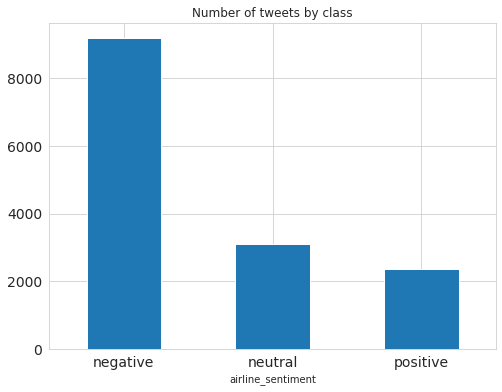

In [13]:

df.groupby(['airline_sentiment']).count().plot(kind='bar', figsize=(8, 6), rot=0, legend=False, title='Number of tweets by class');

In [14]:

pd.set_option('display.max_colwidth',-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [15]:
df.sample(5)

text airline_sentiment
14570  @AmericanAir I really hope it departs. They said is because the catering service wasnt available but we can see it next to plane doing nthin  negative        
1748   @united I was rebooked but had to take bus from Portland Maine to Boston. Told United does not cover the charge.                              negative        
8608   @JetBlue thanks!                                                                                                                              positive        
8618   @JetBlue but you guys should know that musicians are very sensitive about the safety of their instruments when flying. For good reason.       negative        
6105   @SouthwestAir Yes - with extra $77. I wonder what are you going yo loose, if there is room.                                                   negative

pre process data

In [16]:
le = LabelEncoder()
df['target'] = le.fit_transform(df['airline_sentiment'])

text cleaning

In [17]:
ct = TextCleaner()
df['clean_text'] = ct.transform(df['text'])

Tokenizer

In [18]:
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
stemmer = snowballstemmer.EnglishStemmer()

def tokenize(s): 
    tokens = re_tok.sub(r' \1 ', s).split()
    return stemmer.stemWords(tokens)

Train , test splitting

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'].values, df['target'].values, test_size=0.25, random_state=0)

In [20]:
vect = TfidfVectorizer(strip_accents='unicode', tokenizer=tokenize, ngram_range=(1, 2), max_df=0.75, min_df=3, sublinear_tf=True)

In [21]:
tfidf_train = vect.fit_transform(X_train)
tfidf_test = vect.transform(X_test)

In [22]:
def naive_bayes(x, y):
    r = []; b = []
    labels = np.unique(y)

    for l in labels:
        other_l = labels[labels != l]
        p = x[y == l].sum(0) + 1
        q = x[(y == other_l[0]) | (y == other_l[1])].sum(0) + 1
        r.append(np.log((p/p.sum())/(q/q.sum())))
        b.append(np.log(len(p)/len(q)))
    
    return r, b

In [23]:
r, b = naive_bayes(tfidf_train, y_train)

pre_preds = []
for j in range(len(r)):
    pre_preds.append(np.asarray(tfidf_test @ r[j].T + b[j]).reshape(-1))
arr = np.array(pre_preds)

In [24]:
metrics.accuracy_score(y_test, np.argmax(arr.T, 1))

0.7959016393442623

In [25]:
print(metrics.classification_report(y_test, np.argmax(arr.T, 1), target_names=le.classes_))

              precision    recall  f1-score   support

    negative       0.82      0.94      0.87      2327
     neutral       0.72      0.49      0.59       772
    positive       0.77      0.63      0.69       561

    accuracy                           0.80      3660
   macro avg       0.77      0.69      0.72      3660
weighted avg       0.79      0.80      0.78      3660



In [26]:

scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
model=scikit_log_reg.fit(tfidf_train,y_train)
#scores = cross_val_score(LogisticRegression(C=4, dual=True), tfidf_train, y_train,  cv=5)
#scores = cross_val_score(LogisticRegression(C=4, dual=True), tfidf_train, y_train, cv=2)
# scores = cross_val_score(LogisticRegression(C=4, dual=True), tfidf_train, y_train, cv=5)
#scores = cross_val_score(LogisticRegression(penalty='none',solver='saga'))
#scores = cross_val_score(LogisticRegression(C=4, dual=True), tfidf_train, y_train)

[LibLinear]

In [27]:
m = LogisticRegression(C=4, dual=False)
m.fit(tfidf_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=4)

In [28]:
preds = m.predict(tfidf_test)
(preds==y_test).mean()

0.8046448087431693

In [29]:
print(metrics.classification_report(y_test, preds, target_names=le.classes_))

              precision    recall  f1-score   support

    negative       0.84      0.93      0.88      2327
     neutral       0.68      0.56      0.61       772
    positive       0.79      0.64      0.71       561

    accuracy                           0.80      3660
   macro avg       0.77      0.71      0.73      3660
weighted avg       0.80      0.80      0.80      3660



In [30]:
def get_tokens_coefs(vocab, coefs, n):
    coef_df = pd.DataFrame({'vocab': vocab, 'coef':coefs.reshape(-1)})
    return coef_df.sort_values('coef', ascending=False).reset_index(drop=True)[:n]

In [31]:
def plot_tokens_coefs(df, ax, label):
    df.sort_values('coef').plot.barh(legend=False, ax=ax)
    ax.set_yticklabels(df['vocab'].values.tolist()[::-1])
    ax.set_title(label);

In [33]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
sns.set_style(style='white')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


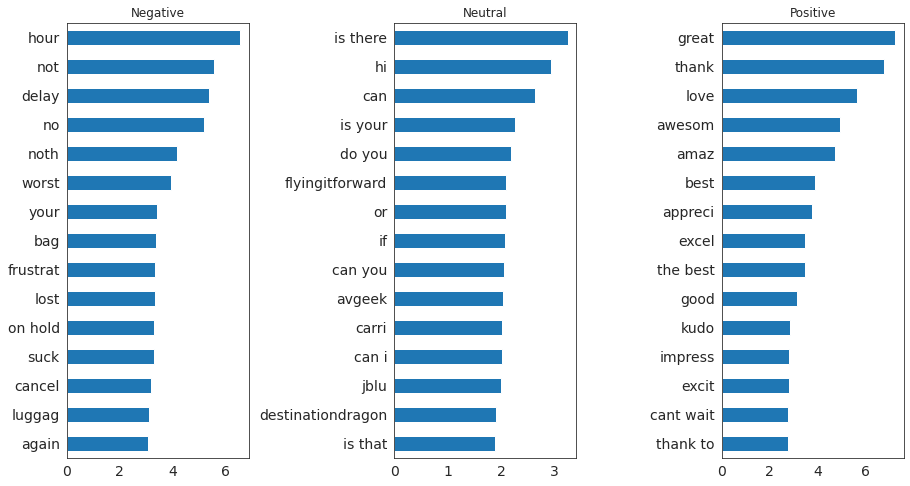

In [34]:
vocab = vect.get_feature_names()
n_coefs = 15

fig, axs = plt.subplots(1, 3, figsize=(15, 8))
fig.subplots_adjust(wspace=0.8)

for i, l in enumerate(['Negative', 'Neutral', 'Positive']):
    coef_df = get_tokens_coefs(vocab, m.coef_[i], n_coefs)
    plot_tokens_coefs(coef_df, axs[i], l)